In [1]:
import pyute as ut
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pdb
%matplotlib notebook

/home/mossing/Documents/code/downloads/OASIS/oasis/functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
ds_l4 = '../shared_data/pyr_l4_data_struct.hdf5'
ds_l23 = '../shared_data/pyr_l23_data_struct.hdf5'

In [3]:
ds_l23 = '/media/mossing/lab_dongle/pyr_l23_data_struct.hdf5'

In [11]:
with ut.hdf5read(ds_l23) as ds:
    keylist = list(ds.keys())
    for key in keylist:
        if 'figure_ground_0' in ds[key]:
            print(key)
    print(list(ds[keylist[5]].keys()))

session_181209_M8536
session_190128_M8982
session_190130_M9667
session_190131_M9355
session_190208_M9355
session_190212_M8536
['cell_center', 'cell_depth', 'cell_id', 'cell_mask', 'cell_type', 'figure_ground_0', 'mouse_id', 'retinotopy_0', 'size_contrast_0']


In [12]:
tunings = []
lbs = []
ubs = []
lkats = []
with h5py.File(ds_l23,mode='r') as data_struct:
    keylist = list([key for key in data_struct])
    for k in range(len(keylist)):
        if 'figure_ground_0' in data_struct[keylist[k]]:
            fg = data_struct[keylist[k]]['figure_ground_0']
            sc = data_struct[keylist[k]]['size_contrast_0']
            nbefore = fg['nbefore'][()]
            nafter = fg['nafter'][()]
#             print(nbefore)
#             print(nafter)
            ncells = fg['F'].shape[0]
            nangle = 8
            ori_tuning = np.zeros((ncells,nangle,5))
            ori_lb = np.zeros((ncells,nangle,5))
            ori_ub = np.zeros((ncells,nangle,5))
            for i in range(nangle):
                for j in range(5):
                    thisangle = np.logical_and(fg['stimulus_id'][0]==j,fg['stimulus_id'][1]==i)
#                     print(fg['F'][:,thisangle][:,:,nbefore:-nafter].shape)
                    tavg = np.nanmean(fg['F'][:,thisangle][:,:,nbefore:-nafter],-1)
                    for ii in range(tavg.shape[0]):
                        ori_lb[ii,i,j],ori_ub[ii,i,j] = ut.bootstrap(tavg[ii],np.nanmean,axis=0,pct=(16,84))
                    ori_tuning[:,i,j] = np.nanmean(tavg,-1)
            lkat = np.where(np.logical_and(sc['rf_distance_deg'][()]<10,sc['rf_mapping_pval'][()]<0.05))[0]
            tunings.append(ori_tuning)
            lbs.append(ori_lb)
            ubs.append(ori_ub)
            lkats.append(lkat)

/home/mossing/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


In [10]:
tunings_l4 = []
lbs_l4 = []
ubs_l4 = []
lkats_l4 = []
with h5py.File(ds_l4,mode='r') as data_struct:
    keylist = list([key for key in data_struct])
    for k in range(len(keylist)):
        print(keylist[k])
        if 'figure_ground_0' in data_struct[keylist[k]]:
            fg = data_struct[keylist[k]]['figure_ground_0']
            sc = data_struct[keylist[k]]['size_contrast_0']
            nbefore = fg['nbefore'][()]
            nafter = fg['nafter'][()]
#             print(nbefore)
#             print(nafter)
            ncells = fg['F'].shape[0]
#             print(fg['F'].shape)
            nangle = 8
            ori_tuning = np.zeros((ncells,nangle,5))
            ori_lb = np.zeros((ncells,nangle,5))
            ori_ub = np.zeros((ncells,nangle,5))
#             print(fg['stimulus_id'][:])
            for i in range(nangle):
                for j in range(5):
                    thisangle = np.logical_and(fg['stimulus_id'][0]==j,fg['stimulus_id'][1]==i)
#                     print((fg['F'][()][:,thisangle][:,:,nbefore:-nafter]).shape)
#                     print(fg['F'][:,thisangle][:,:,nbefore:-nafter].shape)
                    tavg = np.nanmean(fg['F'][()][:,thisangle][:,:,nbefore:-nafter],-1)
                    for ii in range(tavg.shape[0]):
                        ori_lb[ii,i,j],ori_ub[ii,i,j] = ut.bootstrap(tavg[ii],np.nanmean,axis=0,pct=(16,84))
                    ori_tuning[:,i,j] = np.nanmean(tavg,-1)
            if 'rf_mapping_pval' in sc:
                lkat = np.where(np.logical_and(sc['rf_distance_deg'][()]<10,sc['rf_mapping_pval'][()]<0.05))[0]
            else:
                lkat = np.where(sc['rf_distance_deg'][()]<10)[0]
            tunings_l4.append(ori_tuning)
            lbs_l4.append(ori_lb)
            ubs_l4.append(ori_ub)
            lkats_l4.append(lkat)

session_181127_M10073
session_190202_M10075
session_190304_M10077
session_190607_M10443
session_190620_M10616
session_190620_M10619
session_190624_M10615
session_190627_M10616


In [3]:
def define_trials(k):
    center = data_struct[keylist[k]]['stimulus_id'][0] == 1
    ground = data_struct[keylist[k]]['stimulus_id'][0] == 2
    iso = data_struct[keylist[k]]['stimulus_id'][0] == 3
    cross = data_struct[keylist[k]]['stimulus_id'][0] == 4
    return center,ground,iso,cross

In [13]:
# def plot_center_ground_cross(lbs,ubs,k,ind):
#     for which in (1,2,4):
#         plt.fill_between(np.arange(8),lbs[k][ind,:,which],ubs[k][ind,:,which],alpha=0.5)

In [28]:
def plot_center_ground_cross(lbs,ubs,k,ind):
    for which in (1,2,3,4):
        plt.fill_between(np.arange(8),lbs[k][ind,:,which],ubs[k][ind,:,which],alpha=0.5)
def plot_ctrl_cross(lbs,ubs,k,ind):
    for which in (0,4):
        plt.fill_between(np.arange(8),lbs[k][ind,:,which],ubs[k][ind,:,which],alpha=0.5)

In [20]:
def decide_cross_tuned(lbs,ubs,k):
    return np.logical_and(lbs[k][:,:,4].max(1)>ubs[k][:,:,4].min(1), lbs[k][:,:,4].max(1)>ubs[k][:,:,0].max(1))

In [112]:
def decide_anything_tuned(lbs,ubs,k):
    return np.logical_and(lbs[k][:,:,:].max(2).max(1)>ubs[k][:,:,:].max(2).min(1), lbs[k][:,:,:].max(2).max(1)>ubs[k][:,:,0].max(1))

<IPython.core.display.Javascript object>


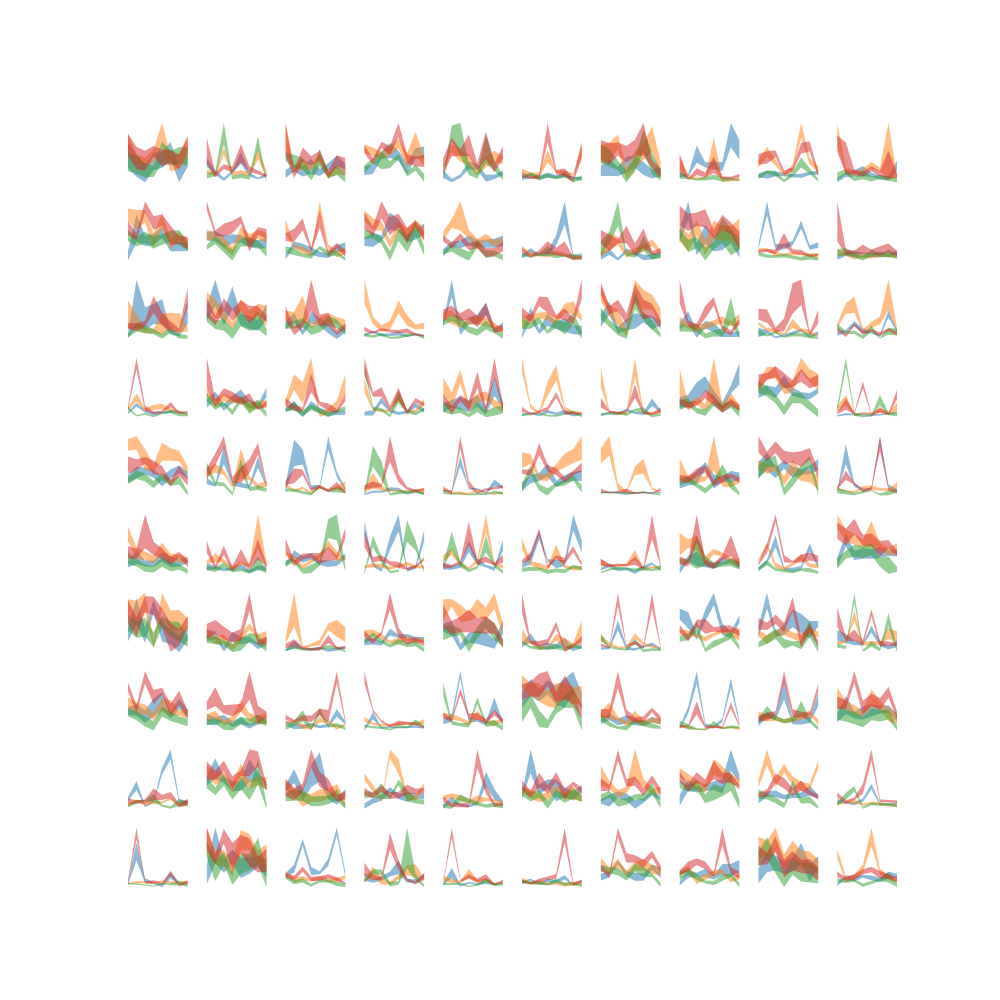

In [113]:
for k in range(1): #len(tunings)):
    plt.figure(figsize=(10,10))
    xtuned = decide_anything_tuned(lbs,ubs,k) # decide_cross_tuned
    interesting = np.zeros_like(xtuned,dtype='bool')
#     interesting[lkats[k]] = xtuned[lkats[k]]
    interesting = xtuned
    interesting = np.where(interesting)[0]
    for i in range(np.minimum(100,len(interesting))): #len(lkats[k]))):
        plt.subplot(10,10,i+1)
#         plot_center_ground_cross(lbs,ubs,k,lkats[k][i])
        plot_center_ground_cross(lbs,ubs,k,interesting[i])
        plt.axis('off')
ut.mkdir('figures')
plt.savefig('figures/l23_tuning_curves.pdf')

<IPython.core.display.Javascript object>


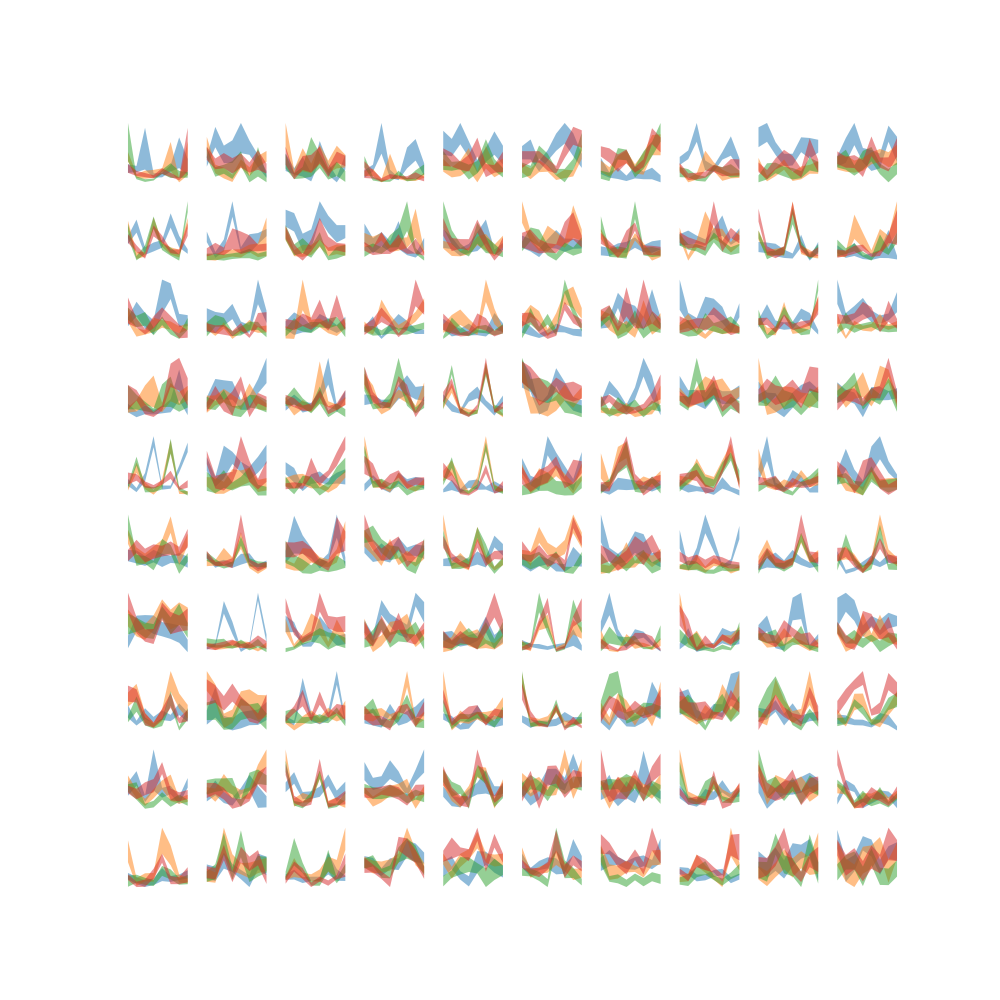

In [114]:
for k in range(1,2): #len(tunings_l4)):
    plt.figure(figsize=(10,10))
    xtuned = decide_anything_tuned(lbs_l4,ubs_l4,k) #decide_cross_tuned
    interesting_l4 = np.zeros_like(xtuned,dtype='bool')
#     interesting[lkats_l4[k]] = xtuned[lkats_l4[k]]
    interesting_l4 = xtuned
    interesting_l4 = np.where(interesting_l4)[0]
    for i in range(np.minimum(100,len(interesting_l4))): #len(lkats[k]))):
        plt.subplot(10,10,i+1)
#         plot_center_ground_cross(lbs_l4,ubs_l4,k,lkats_l4[k][i])
        plot_center_ground_cross(lbs_l4,ubs_l4,k,interesting_l4[i])
        plt.axis('off')
ut.mkdir('figures')
plt.savefig('figures/l4_tuning_curves.pdf')

In [86]:
def tuning_heatmap(tuning,inds):
    data = tuning[inds].max(1)
    print(data.shape)
    sort_by_preferred = np.argsort(np.argmax(data,1))
    print(sort_by_preferred.shape)
    plt.imshow(data[sort_by_preferred]/data[sort_by_preferred].max(1)[:,np.newaxis])

In [177]:
def plot_sorted(tuning,inds):
    data = tuning[inds][:,:,[1,2,4]].max(1)
    print(data.shape)
    sort_stimuli = np.argsort(data,1)[:,::-1]
#     print(sort_stimuli)
    data_sorted = data.copy()
    for i in range(data_sorted.shape[0]):
        data_sorted[i] = np.sort(data[i])[::-1]
    data_sorted = data_sorted/data_sorted.max(1)[:,np.newaxis]
    lb,ub = ut.bootstrap(data_sorted,np.mean,axis=0)
    plt.fill_between((0,1,2),lb,ub,alpha=0.5)

<IPython.core.display.Javascript object>


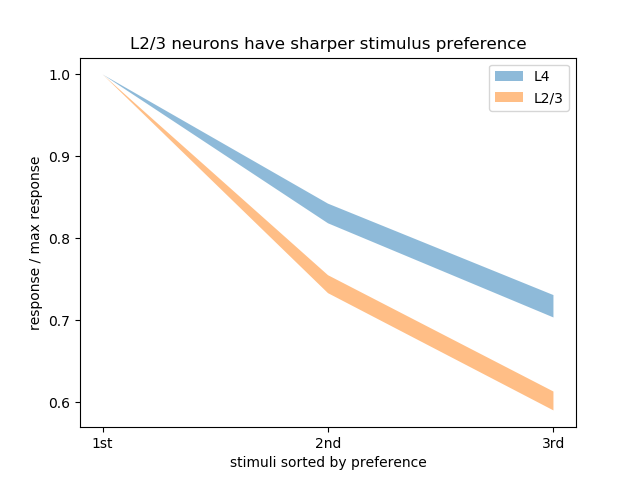

(518, 3)
(1256, 3)


In [184]:
plt.figure()
plot_sorted(tunings_l4[1],interesting_l4)
plot_sorted(tunings[0],interesting)
plt.legend(['L4','L2/3'])
plt.xlabel('stimuli sorted by preference')
plt.ylabel('response / max response')
plt.xticks([0,1,2],['1st','2nd','3rd'])
plt.title('L2/3 neurons have sharper stimulus preference')
plt.savefig('figures/l23_l4_sort_by_pref.pdf')
# plt.ylim((0,1.2))

<IPython.core.display.Javascript object>


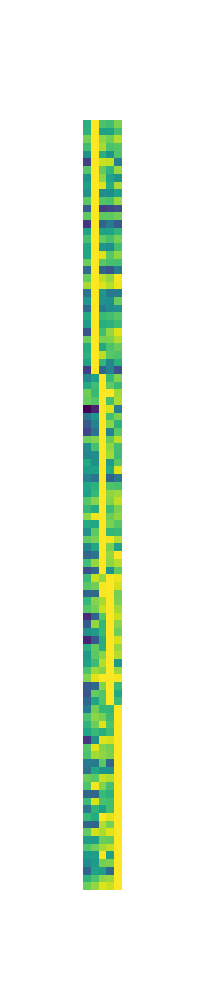

(100, 5)
(100,)


In [147]:
plt.figure(figsize=(2,10))
tuning_heatmap(tunings_l4[1],interesting_l4[:100])
plt.axis('off')
plt.savefig('figures/l4_heatmap.pdf')

<IPython.core.display.Javascript object>


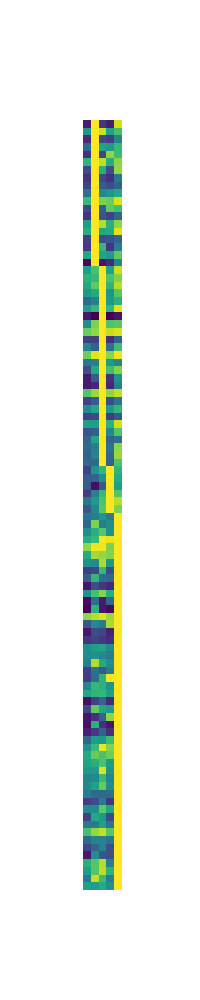

(100, 5)
(100,)


In [148]:
plt.figure(figsize=(2,10))
tuning_heatmap(tunings[0],interesting[:100])
plt.axis('off')
plt.savefig('figures/l23_heatmap.pdf')

In [136]:
def tuning_heatmap_all_directions(tuning,inds,transpose=False):
    if transpose:
        data = tuning[inds,:,1:].transpose((0,2,1)).reshape((tuning[inds].shape[0],-1))
    else:
        data = tuning[inds,:,1:].reshape((tuning[inds].shape[0],-1))
    print(data.shape)
    sort_by_preferred = np.argsort(np.argmax(data,1))
    print(sort_by_preferred.shape)
    mx = data[sort_by_preferred].max(1)[:,np.newaxis]
    mn = 0#data[sort_by_preferred].min(1)[:,np.newaxis]
    plt.imshow((data[sort_by_preferred]-mn)/(mx-mn),extent=[0,100,0,100])

In [138]:
def tuning_heatmap_all_directions_no_iso(tuning,inds,transpose=False):
    if transpose:
        data = tuning[inds][:,:,[1,2,4]].transpose((0,2,1)).reshape((tuning[inds].shape[0],-1))
    else:
        data = tuning[inds][:,:,[1,2,4]].reshape((tuning[inds].shape[0],-1))
    print(data.shape)
    sort_by_preferred = np.argsort(np.argmax(data,1))
    print(sort_by_preferred.shape)
    mx = data[sort_by_preferred].max(1)[:,np.newaxis]
    mn = 0#data[sort_by_preferred].min(1)[:,np.newaxis]
    plt.imshow((data[sort_by_preferred]-mn)/(mx-mn),extent=[0,100,0,100])

<IPython.core.display.Javascript object>


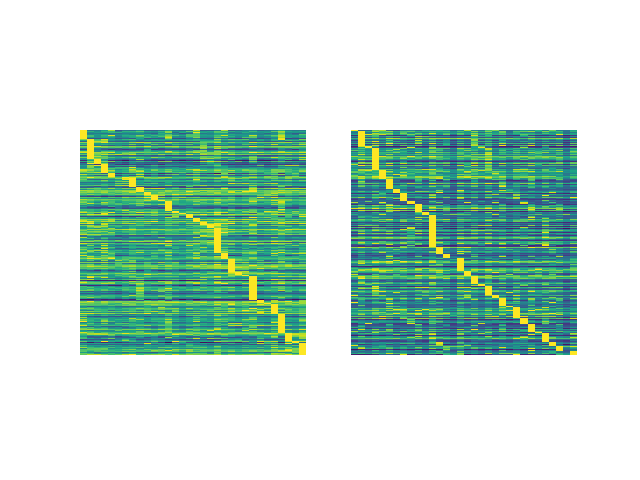

(518, 32)
(518,)
(1256, 32)
(1256,)


In [143]:
plt.figure()#figsize=(2,10))
plt.subplot(1,2,1)
tuning_heatmap_all_directions(tunings_l4[1],interesting_l4)
plt.axis('off')
plt.subplot(1,2,2)
tuning_heatmap_all_directions(tunings[0],interesting)
plt.axis('off')
plt.savefig('figures/l4_l23_heatmaps_direction_adjacent.pdf')
# plt.savefig('figures/l4_heatmap.pdf')

<IPython.core.display.Javascript object>


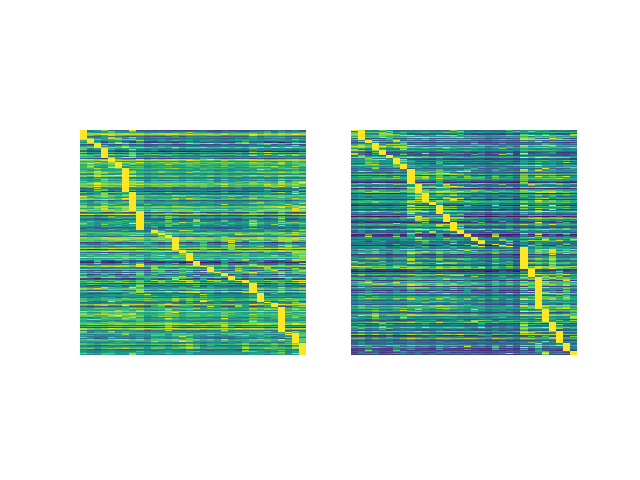

(518, 32)
(518,)
(1256, 32)
(1256,)


In [146]:
plt.figure()#figsize=(2,10))
plt.subplot(1,2,1)
tuning_heatmap_all_directions(tunings_l4[1],interesting_l4,transpose=True)
plt.axis('off')
plt.subplot(1,2,2)
tuning_heatmap_all_directions(tunings[0],interesting,transpose=True)
plt.axis('off')
plt.savefig('figures/l4_l23_heatmaps_stim_type_adjacent.pdf')

<IPython.core.display.Javascript object>


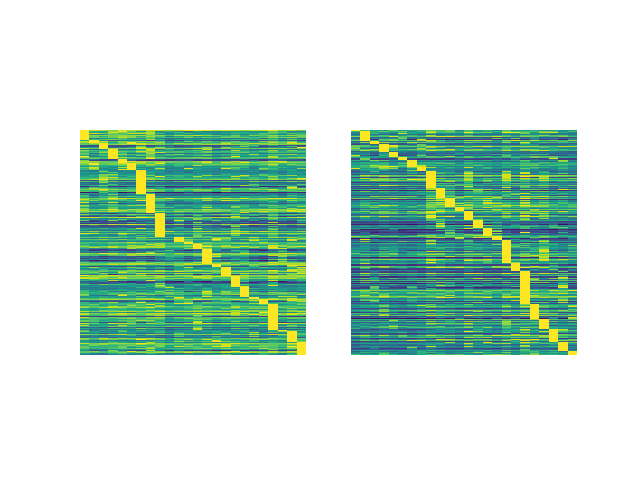

(518, 24)
(518,)
(1256, 24)
(1256,)


In [144]:
plt.figure()#figsize=(2,10))
plt.subplot(1,2,1)
tuning_heatmap_all_directions_no_iso(tunings_l4[1],interesting_l4,transpose=True)
plt.axis('off')
plt.subplot(1,2,2)
tuning_heatmap_all_directions_no_iso(tunings[0],interesting,transpose=True)
plt.axis('off')
plt.savefig('figures/l4_l23_heatmaps_stim_type_adjacent_no_iso.pdf')

<IPython.core.display.Javascript object>


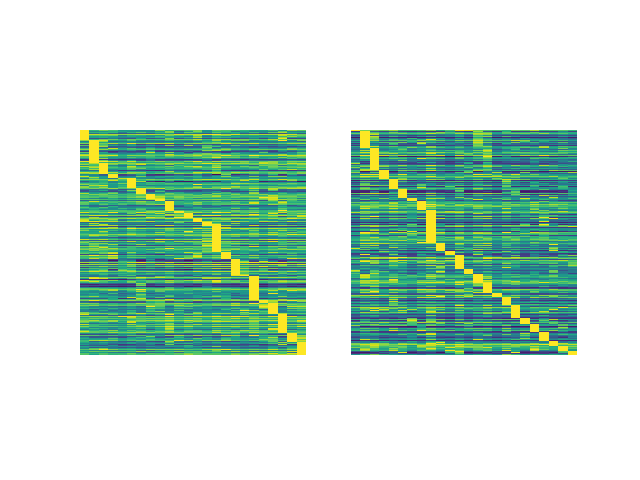

(518, 24)
(518,)
(1256, 24)
(1256,)


In [145]:
plt.figure()#figsize=(2,10))
plt.subplot(1,2,1)
tuning_heatmap_all_directions_no_iso(tunings_l4[1],interesting_l4,transpose=False)
plt.axis('off')
plt.subplot(1,2,2)
tuning_heatmap_all_directions_no_iso(tunings[0],interesting,transpose=False)
plt.axis('off')
plt.savefig('figures/l4_l23_heatmaps_direction_adjacent_no_iso.pdf')